## Correlation Plot between the velocity of two keypoints

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "../skeleton.toml"


In [2]:
experiment = 10
session = session_list[experiment]
obj_ref = obj_ref_frame[experiment]

In [3]:
from scripts.tools.ground_truth_toml_reader import GroundTruth
from src.loader import InstanceLoader
from src.collision import CollisionDetector


gt = GroundTruth(data_folder, prefix, session)
track_list = gt["tracks"]


# Load the experiment
t = InstanceLoader(data_folder=data_folder,
                   session_number=session,
                   skeleton_toml_path=skeleton_toml_path,
                   obj_ref_frame=obj_ref,
                   prefix=prefix,
                   track_number=track_list)


In [4]:
from scripts.tools.animal_dataframe import AnimalDataFrame
import numpy as np
node_of_interest = ['a_L2', 'a_R2']
_acceleration_array = np.empty((10000000, len(node_of_interest)), dtype=np.float64)
n_samples = 0

In [5]:

for track in track_list:
    animal = t.animal_list.animal(track)
    adf = AnimalDataFrame(animal, None, node_of_interest, signed=True)
    acceleration_df = adf.velocity_mag(clean=True)
    #Get only samples where all are not nan
    not_na = acceleration_df.dropna(axis=1).T
    #Extract the datapoints and add them to an array
    _acceleration_array[n_samples: n_samples + len(not_na), :] = not_na
    n_samples += len(not_na)

_acceleration_array_trim = _acceleration_array[_acceleration_array.any(axis=1)]

/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty sli

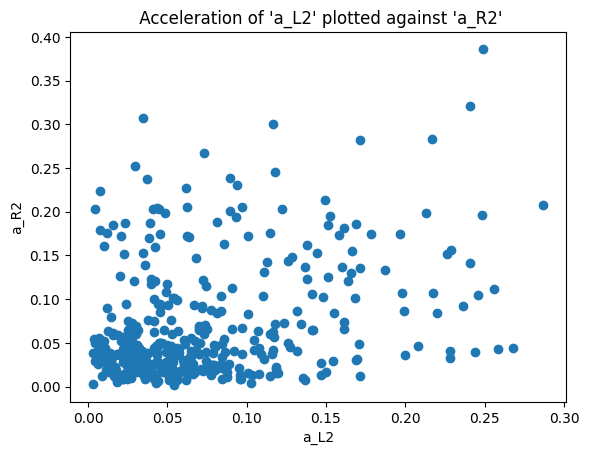

In [6]:
fig, ax = plt.subplots()
ax.scatter(_acceleration_array_trim[:, 0], _acceleration_array_trim[:, 1])

ax.set_title(" Acceleration of 'a_L2' plotted against 'a_R2'")
ax.set_xlabel("a_L2")
ax.set_ylabel("a_R2")

plt.show()


In [7]:
np.cov(_acceleration_array_trim, rowvar=False)

array([[0.00332343, 0.00127885],
       [0.00127885, 0.00414914]])